# Principal Component Analysis

In [1]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io
import time

%matplotlib inline

## Data Visualization

In [2]:
ex7data1 = scipy.io.loadmat('data/ex7data1.mat')
X = ex7data1['X']

In [3]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

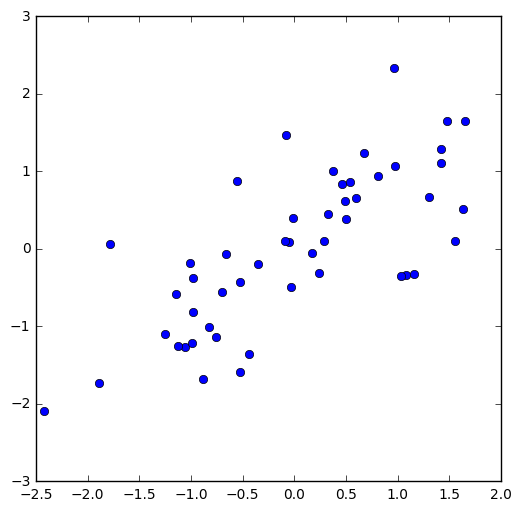

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.show()

In [5]:
def PCA(X, K=None, remain_variance=0.99):
    m = np.size(X, axis=0)
    Sigma = (X.T @ X) / m
    U, S, V = np.linalg.svd(Sigma)
    if K is None or K <= 0:
        S_trace_sum = S.trace()
        K = 0
        sum_S = 0
        while sum_S / total_S < remain_variance:
            sum_S += S[K, K]
            K += 1
    U_K = U[:K, :]
    return U_K @ X.T, U_K, U, K

In [6]:
X_pca, U_K, U, K = PCA(X_norm, 1)
X_approx = X_pca.T @ U_K

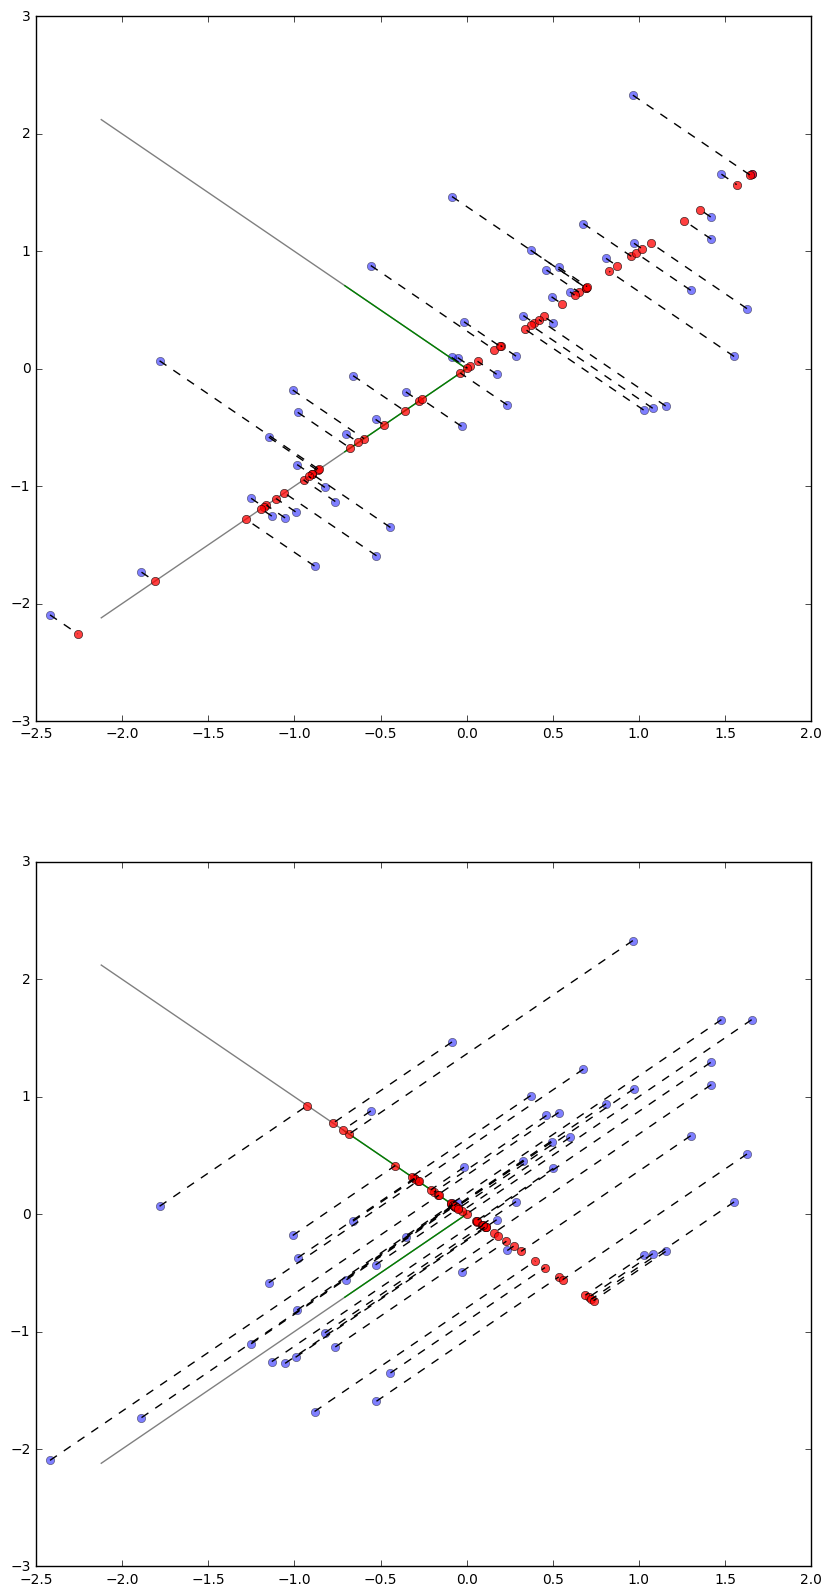

In [12]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', alpha=0.5)
plt.plot([0, U[0, 0] * 3], [0, U[0, 1] * 3], 'k', alpha=0.5)
plt.plot([0, U[1, 0] * 3], [0, U[1, 1] * 3], 'k', alpha = 0.5)
plt.plot([0, U[0, 0]], [0, U[0, 1]], 'g')
plt.plot([0, U[1, 0]], [0, U[1, 1]], 'g')
plt.plot(X_approx[:, 0], X_approx[:, 1], 'ro', alpha=0.75)
for i in range(np.size(X_norm, axis=0)):
    plt.plot((X_norm[i, 0], X_approx[i, 0]), (X_norm[i, 1], X_approx[i, 1]), 'k--')
plt.subplot(2, 1, 2)
X_pca_2 = U[1:2, :] @ X_norm.T
X_approx_2 = X_pca_2.T @ U[1:2, :]
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo', alpha=0.5)
plt.plot([0, U[0, 0] * 3], [0, U[0, 1] * 3], 'k', alpha=0.5)
plt.plot([0, U[1, 0] * 3], [0, U[1, 1] * 3], 'k', alpha = 0.5)
plt.plot([0, U[0, 0]], [0, U[0, 1]], 'g')
plt.plot([0, U[1, 0]], [0, U[1, 1]], 'g')
plt.plot(X_approx_2[:, 0], X_approx_2[:, 1], 'ro', alpha=0.75)
for i in range(np.size(X_norm, axis=0)):
    plt.plot((X_norm[i, 0], X_approx_2[i, 0]), (X_norm[i, 1], X_approx_2[i, 1]), 'k--')
plt.show()

## Face Image Data